In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir("/content/gdrive/My Drive/Colab Notebooks/WheatHeadProject/") 

In [ ]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import *
#from Hongyu_model import *
import torch
%matplotlib inline

In [ ]:
from Hongyu_model import *

In [ ]:
# Step 3
from torchvision import datasets, transforms
transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])

In [ ]:
root1 = '/content/gdrive/My Drive/DeepLearning898/global-wheat-detection/'

In [ ]:
part_train = os.path.join(root1,'test')

path_sets = [part_train]

In [ ]:
part_train = os.path.join(root1,'Aug_train')

path_sets = [part_train]

In [ ]:
path_sets

['/content/gdrive/My Drive/DeepLearning898/global-wheat-detection/test']

In [ ]:
part_train

'/content/gdrive/My Drive/DeepLearning898/global-wheat-detection/train'

In [ ]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [ ]:
#img_paths = test_data

#with tf.device('/device:GPU:0'):
mae = 0
for i in range(len(img_paths)):
  img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
  output = model(img.unsqueeze(0))
  print ('predict:', output.detach().cpu().sum().numpy())
  
print (mae/len(img_paths)) 

predict: 26.266487
predict: 28.676435
predict: 24.48838
predict: 34.279366
predict: 25.43161
predict: 17.379793
predict: 31.888618
predict: 15.959312
predict: 23.315983
predict: 21.547245
0.0


In [ ]:
test_data

In [ ]:
### Validation Set
import json 
# Step 4

with open('/content/gdrive/My Drive/Colab Notebooks/WheatHeadProject/wh_val.json') as json_file:
#with open('wh_val.json') as json_file:
 
    test_data = json.load(json_file)
    
 

In [ ]:
### Validation Set
import json 
# Step 4

with open('/content/gdrive/My Drive/Colab Notebooks/WheatHeadProject/wh_test_aug_flip.json') as json_file:
#with open('wh_val.json') as json_file:
 
    test_data = json.load(json_file)

In [ ]:
import json 
## Train Set
# Step 4

with open('/content/gdrive/My Drive/Colab Notebooks/WheatHeadProject/wh_train.json') as json_file:
#with open('wh_val.json') as json_file:
 
    train_data = json.load(json_file)
    
 

In [ ]:
import json 
## Train Set
# Step 4

with open('/content/gdrive/My Drive/Colab Notebooks/WheatHeadProject/wh_val.json') as json_file:
#with open('wh_val.json') as json_file:
 
    test_data = json.load(json_file)

In [ ]:
len(test_data)

350

In [ ]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_A_test]

In [ ]:
part_A_train

'./Shanghai/part_A_final/train_data/images'

In [ ]:
# Hongyu Guo model
# Model 1 

import os
from Hongyu_model import *
model = CSRNet()
model = model.cuda()
checkpoint = torch.load('Hongyu_model_best.pth.tar')
model.load_state_dict(checkpoint['state_dict'])
#model.load_state_dict(checkpoint['state_dict'])

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


<All keys matched successfully>

In [ ]:
# Hongyu Guo model
# Model 2 

import os
from WH_M2_model import *
model = CSRNet()
model = model.cuda()
checkpoint = torch.load('WH_M2_0model_best.pth.tar')
model.load_state_dict(checkpoint['state_dict'])
#model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [ ]:
checkpoint = torch.load('Hongyu_model_best.pth.tar')
model.load_state_dict(checkpoint['state_dict'])
#model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [ ]:
# Baseline model
import os
from SNR_model import *
model = CSRNet()
model = model.cuda()
checkpoint = torch.load('SNR_0model_best.pth.tar')
model.load_state_dict(checkpoint['state_dict'])
#model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [ ]:
checkpoint = torch.load('SNR_model_best.pth.tar')
model.load_state_dict(checkpoint)

In [ ]:
# Step 5

model = CSRNet()
model = model.cuda()
checkpoint = torch.load('0model_best.pth.tar')
model.load_state_dict(checkpoint['state_dict'])

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


<All keys matched successfully>

In [ ]:
checkpoint = torch.load('0model_best.pth.tar')
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [ ]:

checkpoint1 = torch.load('No_dilation_0model_best.pth.tar')
model1.load_state_dict(checkpoint1['state_dict'])

In [ ]:
checkpoint['state_dict']

OrderedDict([('frontend.0.weight',
              tensor([[[[-5.5494e-01,  1.4014e-01,  5.2582e-01],
                        [-5.8432e-01,  3.5373e-01,  7.6218e-01],
                        [-6.9121e-01, -5.0230e-02,  4.8102e-01]],
              
                       [[ 1.7387e-01,  7.9116e-03, -8.3548e-02],
                        [ 4.2600e-02, -7.2234e-02, -2.6237e-01],
                        [ 1.3092e-01, -1.7440e-01, -1.3423e-01]],
              
                       [[ 3.1151e-01, -1.6752e-01, -4.2920e-01],
                        [ 4.7353e-01, -8.4367e-02, -4.8864e-01],
                        [ 6.3065e-01,  1.7752e-02, -2.7915e-01]]],
              
              
                      [[[ 2.3212e-01,  1.2630e-01,  1.8560e-01],
                        [-4.2774e-01, -2.4331e-01,  2.4598e-01],
                        [-2.5050e-01,  1.4162e-01, -5.4604e-03]],
              
                       [[-1.4046e-01, -2.1869e-01,  1.5035e-01],
                        [-8.4083e-01, -3

In [ ]:
mae/1667

1.890863985878018

In [ ]:
i

1665

In [ ]:
len(train_data[0:350])
test_data= train_data[0:350]

In [ ]:
len(test_data)

350

In [ ]:
img_paths = test_data[0:1600]

In [ ]:
img_paths = test_data

In [ ]:
test_data

In [ ]:

#img_paths = test_data  #[0:1600]
#with tf.device('/device:GPU:0'):
mae = 0
mse = 0
for i in range(len(img_paths)):
  img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
  gt_file = h5py.File(img_paths[i].replace('.jpg','.h5'),'r')
  groundtruth = np.asarray(gt_file['density'])
  output = model(img.unsqueeze(0))
  gt_num = np.sum(groundtruth)

#Mse 
  mse += pow((output.detach().cpu().sum().numpy()-np.sum(groundtruth)),2) 
  mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
  print (i,'gt: ', gt_num, 'predict:', output.detach().cpu().sum().numpy(), 'mae:', abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth)))

mse = np.sqrt(mse/len(img_paths))   
print (mae/len(img_paths),mse)  


In [ ]:
img_paths

In [ ]:

img_paths = test_data

#with tf.device('/device:GPU:0'):
mae = 0
for i in range(len(img_paths)):
  img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
  gt_file = h5py.File(img_paths[i].replace('.jpg','.h5'),'r')
  groundtruth = np.asarray(gt_file['density'])
  output = model(img.unsqueeze(0))
  gt_num = np.sum(groundtruth)
  mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
  print (i,'gt: ', gt_num, 'predict:', output.detach().cpu().sum().numpy(), 'mae:', abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth)))
  
print (mae/len(img_paths)) 


In [ ]:
pwd

'/content/gdrive/My Drive/Colab Notebooks/WheatHeadProject'

In [ ]:
ls

In [ ]:
from torchvision import transforms
import matplotlib.pyplot as plt

loader = transforms.Compose([
    transforms.ToTensor()])  

unloader = transforms.ToPILImage()

def imshow(tensor, title=None):
    image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
    image = image.squeeze(0)  # remove the fake batch dimension
    image = unloader(image)
    plt.imshow(image, cmap=CM.jet)
    plt.savefig('output.png', dpi=300)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


In [ ]:
i=282
img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
output = model(img.unsqueeze(0))

In [ ]:
i

4

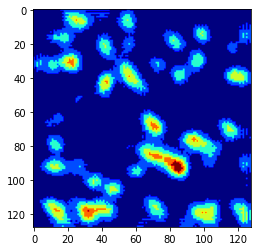

In [ ]:
imshow(output)


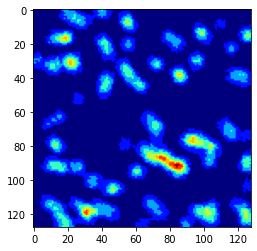

In [ ]:
imshow(output)

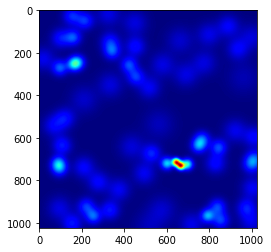

In [ ]:
plt.imshow(groundtruth,cmap=CM.jet)
plt.savefig('GT1.png', dpi=300)

In [ ]:
i = 266

In [ ]:
img_paths[i]

'/content/gdrive/My Drive/DeepLearning898/global-wheat-detection/train/02640d9da.jpg'

In [ ]:
img_paths in ['b2f2a5dfd']

False

In [ ]:
np.sum(groundtruth)

61.102814

In [ ]:
np.sum(output.detach().cpu().sum().numpy())

60.12962

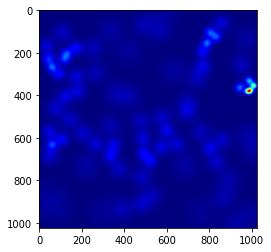

In [ ]:
plt.imshow(groundtruth,cmap=CM.jet)
plt.savefig('GT1.png', dpi=300)

In [ ]:
img_paths[7]

'/content/gdrive/My Drive/DeepLearning898/global-wheat-detection/test/cb8d261a3.jpg'

In [ ]:
i=7
img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
output = model(img.unsqueeze(0))